In [8]:
import seaborn as sns
from IPython.display import Markdown
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics world wide
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease across the world.

Data is sourced from the World Health Organization (WHO) Situation Reports and is available [here](https://ourworldindata.org/coronavirus-source-data).

China data are displayed in a separate graph, in order to make data for the other countries more visible.

A few points that we can learn from the graphs below:
- until mid February, the vast majority of cases were in China (with deaths lagging behind a week)
- in March, cases in China have flattened while they started to explode elsewhere
- Soth Korea was the first country (other than China) to experience a sudden surge in cases but has nearly managed to flatten the curve. Moreover, South Korea has a significantly lower mortality rate (probably due to a higher number of tests performed)
- right now, Italy and Iran are showing the fastest growth, with Spain and France showing the first signs of exponential growth

Follows a list of the top 20 countries in descending order of cases:
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
global_df[(global_df['date']==last_date) & 
          (~global_df['location'].isin(['World', 'International']))]. \
          sort_values(by='total_cases', ascending=False)[['location', 'total_cases']][:20].style.background_gradient(cmap=cm).hide_index()



# COVID-19 statistics world wide
## Last Updated: 2020-03-15 00:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease across the world.

Data is sourced from the World Health Organization (WHO) Situation Reports and is available [here](https://ourworldindata.org/coronavirus-source-data).

China data are displayed in a separate graph, in order to make data for the other countries more visible.

A few points that we can learn from the graphs below:
- until mid February, the vast majority of cases were in China (with deaths lagging behind a week)
- in March, cases in China have flattened while they started to explode elsewhere
- Soth Korea was the first country (other than China) to experience a sudden surge in cases but has nearly managed to flatten the curve. Moreover, South Korea has a significantly lower mortality rate (probably due to a higher number of tests performed)
- right now, Italy and Iran are showing the fastest growth, with Spain and France showing the first signs of exponential growth

Follows a list of the top 20 countries in descending order of cases:


location,total_cases
China,81048
Italy,21157
Iran,12729
South Korea,8162
Spain,5753
France,4469
Germany,3795
United States,1678
Switzerland,1359
United Kingdom,1144


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [4]:
global_df = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")
global_df['date'] = pd.to_datetime(global_df['date'])

In [5]:
first_date = global_df['date'].min()
last_date = global_df['date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{global_df.shape} samples, attributes')
global_df.describe().T

Dates: 2020-01-21 00:00:00 - 2020-03-15 00:00:00
(2553, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
new_cases,2408.0,127.080565,792.835887,-10.0,0.0,0.0,6.0,19572.0
new_deaths,455.0,25.002198,54.753171,0.0,0.0,1.0,18.0,434.0
total_cases,2553.0,2556.145711,13601.420160,1.0,2.0,8.0,40.0,153523.0
total_deaths,492.0,426.089431,995.262430,1.0,1.0,6.0,80.0,5736.0


## Global count and China

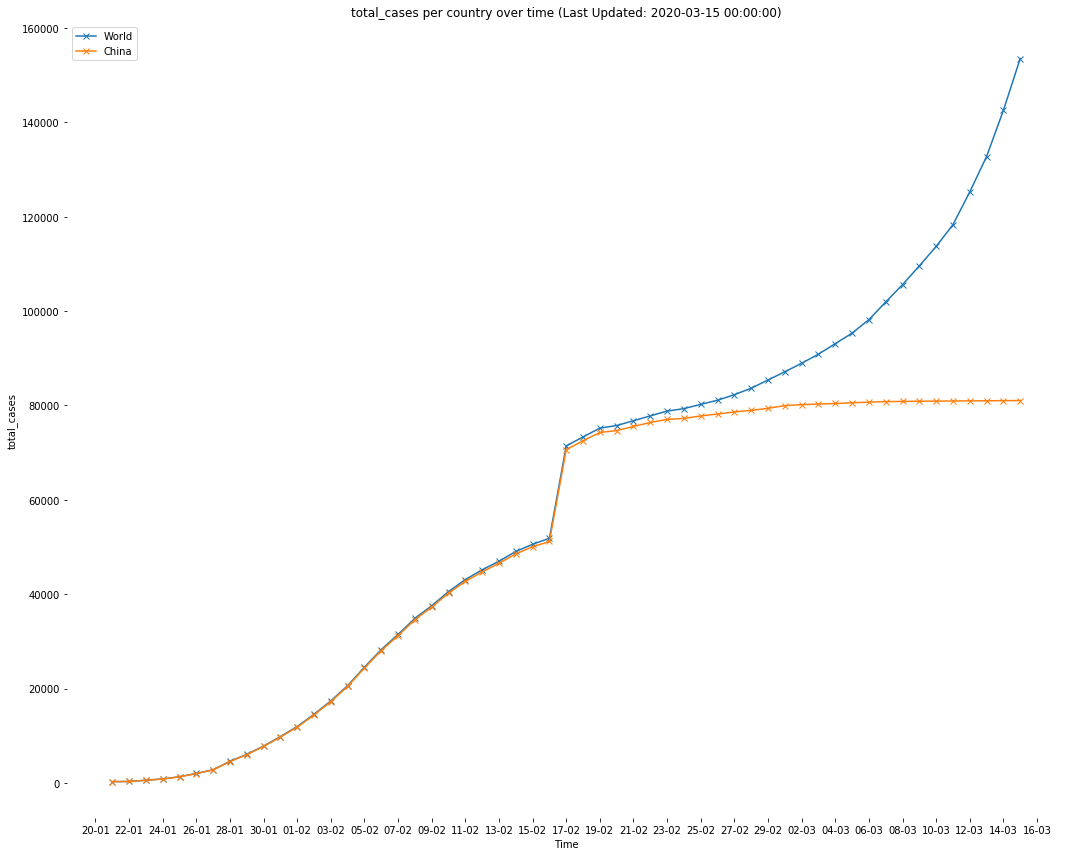

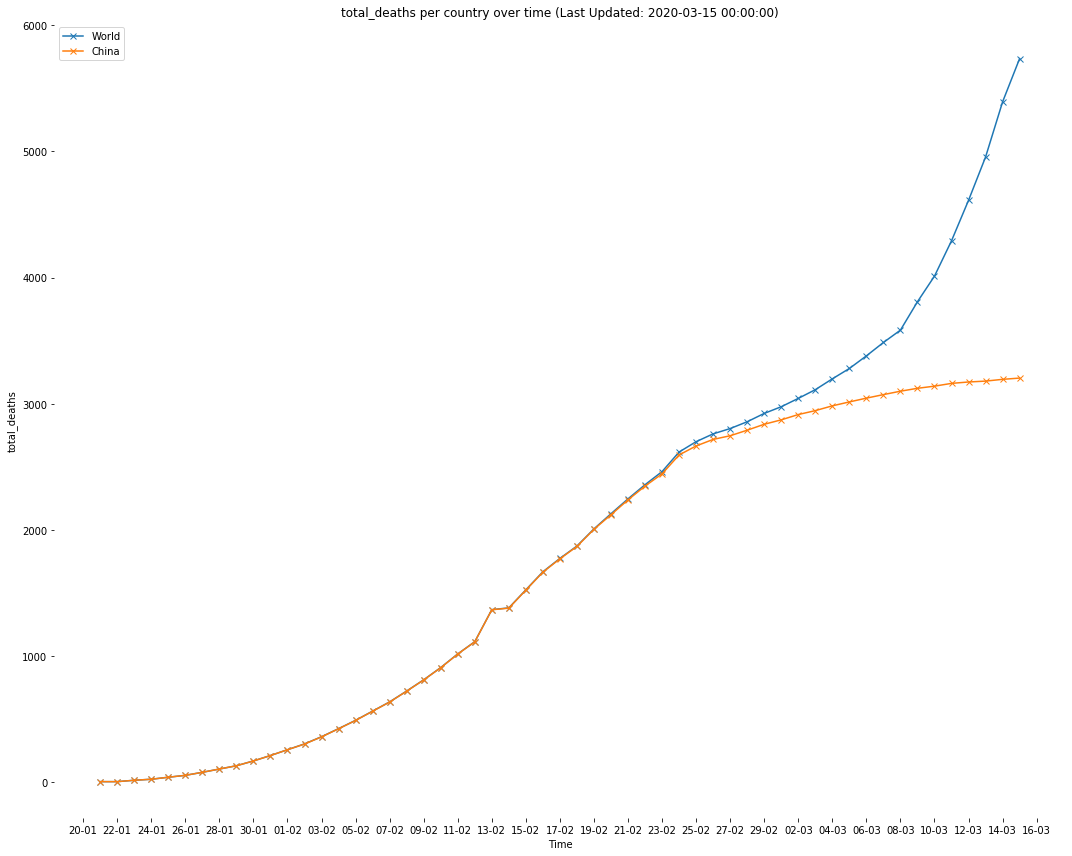

In [6]:
for stat in ['total_cases', 'total_deaths']:
    plt.figure(figsize=(15, 12))
    for region in global_df[(global_df['date']==last_date) & 
                             (global_df['location'].isin(['World', 'China']))].sort_values(by=stat, ascending=False)['location']:
        plt.plot(global_df[global_df['location'] == region]['date'], 
                 global_df[global_df['location'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per country over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}world_{stat}.png', dpi=300)

## All other countries (only the top 20, excluding China)

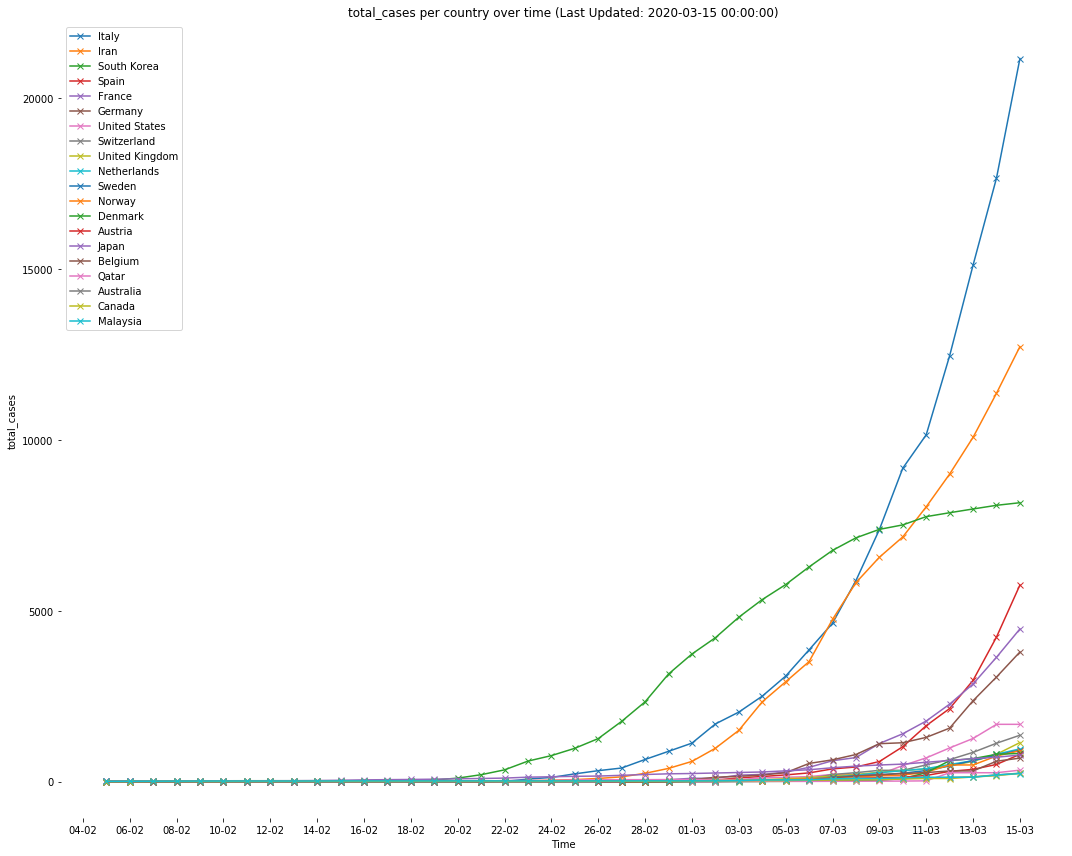

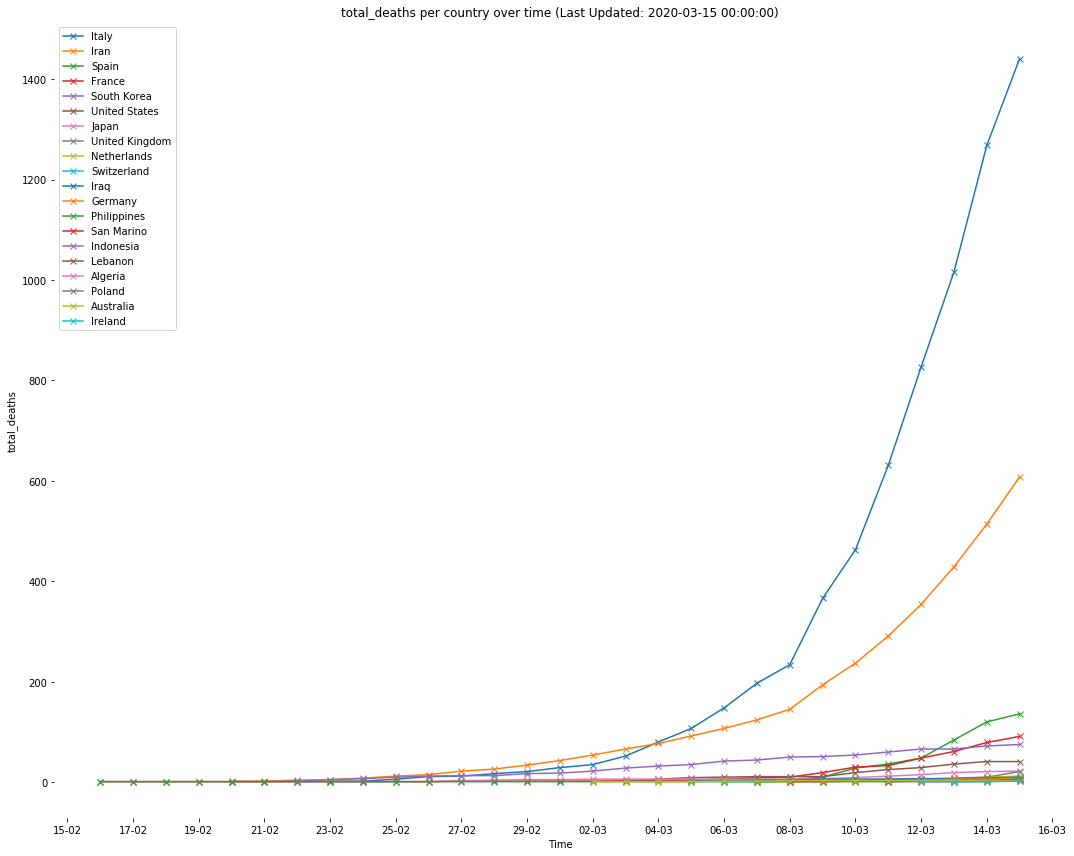

In [7]:
for stat in ['total_cases', 'total_deaths']:
    plt.figure(figsize=(15, 12))
    for region in global_df[(global_df['date']==last_date) & 
                             (~global_df['location'].isin(['World', 'China', 'International']))].sort_values(by=stat, ascending=False)['location'][:20]:
        plt.plot(global_df[(global_df['location'] == region) & (global_df['date'] > ('2020-02-04' if stat=='total_cases' else '2020-02-15'))]['date'], 
                 global_df[(global_df['location'] == region) & (global_df['date'] > ('2020-02-04' if stat=='total_cases' else '2020-02-15'))][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per country over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}countries_ex_china_{stat}.png', dpi=300)